In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis
from scipy import stats

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

# make merged CD86+CD206 datasets
nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth = nucleus_dataset_smooth_206.merge(nucleus_dataset_smooth_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')

surfaces_86 = [nucleus_dataset_p4g4_86, nucleus_dataset_smooth_86, nucleus_dataset_tcps_86]
surfaces_206 = [nucleus_dataset_p4g4_206, nucleus_dataset_smooth_206, nucleus_dataset_tcps_206]

all_surfaces_86 = pd.concat(surfaces_86)
all_surfaces_206 = pd.concat(surfaces_206)

In [36]:
surface_dataframes = []

for i in range(3):
    dataset_86 = surfaces_86[i]
    dataset_206 = surfaces_206[i]
    
    data_86 = dataset_86[dataset_86.CellType == 'M1'].drop('CellType', axis=1)
    data_206 = dataset_206[dataset_206.CellType == 'M1'].drop('CellType', axis=1)

    mean_86 = data_86.mean()
    mean_206 = data_206.mean()

    # Perform a t-test for each column between df1 and df2
    t_statistic, p_values = [], []
    for column in data_86.columns:
        t_stat, p_value = stats.ttest_ind(data_86[column], data_206[column])
        t_statistic.append(t_stat)
        p_values.append(p_value)

    # Create a new DataFrame with the means, t-statistic, and p-value as columns
    difference = pd.DataFrame({'Column_Name': mean_86.index,
                            'mean_86': mean_86.values,
                            'Mean_df2': mean_206.values,
                            'Mean_diff': mean_86.values - mean_206.values,
                            'T-Statistic': t_statistic,
                            'P-Value': p_values})
    surface_dataframes.append(difference)

m1_difference_p4g4 = surface_dataframes[0]
m1_difference_smooth = surface_dataframes[1]
m1_difference_tcps = surface_dataframes[2]

show_table = m1_difference_p4g4
display(show_table[show_table['P-Value'] < 0.01].sort_values(by='P-Value'))
print(len(show_table[show_table['P-Value'] < 0.01]))

,Column_Name,mean_86,Mean_df2,Mean_diff,T-Statistic,P-Value
2,Intensity_MeanIntensityEdge_Nuclei,0.015184,0.018325,-0.003141,-13.989637,1.079931e-40
10,Intensity_IntegratedIntensityEdge_Nuclei,1.742443,2.175069,-0.432626,-12.402202,6.360686e-33
11,Texture_InfoMeas1_Nuclei_3_02_256,-0.098279,-0.079051,-0.019227,-10.638831,4.273477e-25
17,Texture_InfoMeas1_Nuclei_3_01_256,-0.068023,-0.056567,-0.011455,-9.409571,3.406793e-20
7,Intensity_MaxIntensityEdge_Nuclei,0.028659,0.033213,-0.004555,-8.650350,2.062875e-17
35,Texture_InfoMeas1_Nuclei_3_03_256,-0.068184,-0.057920,-0.010264,-8.214310,6.667857e-16
13,Intensity_StdIntensity_Nuclei,0.017352,0.016182,0.001170,7.206267,1.143606e-12
25,AreaShape_Compactness,1.345943,1.491427,-0.145484,-7.180962,1.363887e-12
8,Texture_Correlation_Nuclei_3_02_256,0.483371,0.424948,0.058422,6.669949,4.261689e-11
29,AreaShape_MaximumRadius,14.746365,13.585381,1.160983,5.878615,5.660739e-09


29


In [41]:
surface_dataframes = []

for i in range(3):
    dataset_86 = surfaces_86[i]
    dataset_206 = surfaces_206[i]
    
    data_86 = dataset_86[dataset_86.CellType == 'M2'].drop('CellType', axis=1)
    data_206 = dataset_206[dataset_206.CellType == 'M2'].drop('CellType', axis=1)

    mean_86 = data_86.mean()
    mean_206 = data_206.mean()

    # Perform a t-test for each column between df1 and df2
    t_statistic, p_values = [], []
    for column in data_86.columns:
        t_stat, p_value = stats.ttest_ind(data_86[column], data_206[column])
        t_statistic.append(t_stat)
        p_values.append(p_value)

    # Create a new DataFrame with the means, t-statistic, and p-value as columns
    difference = pd.DataFrame({'Column_Name': mean_86.index,
                            'mean_86': mean_86.values,
                            'Mean_df2': mean_206.values,
                            'Mean_diff': mean_86.values - mean_206.values,
                            'T-Statistic': t_statistic,
                            'P-Value': p_values})
    surface_dataframes.append(difference)

m2_difference_p4g4 = surface_dataframes[0]
m2_difference_smooth = surface_dataframes[1]
m2_difference_tcps = surface_dataframes[2]

show_table = m2_difference_p4g4
display(show_table[show_table['P-Value'] < 0.01].sort_values(by='P-Value'))
print(len(show_table[show_table['P-Value'] < 0.01]))

,Column_Name,mean_86,Mean_df2,Mean_diff,T-Statistic,P-Value
24,Intensity_IntegratedIntensity_Nuclei,32.443810,21.366291,11.077519,34.944454,2.230983e-200
4,Intensity_LowerQuartileIntensity_Nuclei,0.034342,0.026992,0.007351,27.481528,4.772769e-137
32,Intensity_MeanIntensity_Nuclei,0.046128,0.037805,0.008323,27.315138,1.092052e-135
10,Intensity_IntegratedIntensityEdge_Nuclei,1.892935,1.430803,0.462132,25.868832,5.243809e-124
1,AreaShape_Area,698.561379,569.617486,128.943893,24.477795,5.022138e-113
2,Intensity_MeanIntensityEdge_Nuclei,0.021533,0.018156,0.003377,22.313317,1.618186e-96
33,AreaShape_MinFeretDiameter,27.034849,24.162507,2.872341,20.367764,2.208822e-82
29,AreaShape_MaximumRadius,13.023780,11.732375,1.291405,17.586132,1.498106e-63
8,Texture_Correlation_Nuclei_3_02_256,0.492449,0.398348,0.094101,14.977964,1.251057e-47
23,Texture_AngularSecondMoment_Nuclei_3_00_256,0.043056,0.013658,0.029399,14.665091,7.603998e-46


26


In [21]:
surface_dataframes = []

for i in range(3):
    data_86 = surfaces_86[i].drop('CellType', axis=1)
    data_206 = surfaces_206[i].drop('CellType', axis=1)

    mean_86 = data_86.mean()
    mean_206 = data_206.mean()

    # Perform a t-test for each column between df1 and df2
    t_statistic, p_values = [], []
    for column in data_86.columns:
        t_stat, p_value = stats.ttest_ind(data_86[column], data_206[column])
        t_statistic.append(t_stat)
        p_values.append(p_value)

    # Create a new DataFrame with the means, t-statistic, and p-value as columns
    difference = pd.DataFrame({'Column_Name': mean_86.index,
                            'mean_86': mean_86.values,
                            'Mean_df2': mean_206.values,
                            'Mean_diff': mean_86.values - mean_206.values,
                            'T-Statistic': t_statistic,
                            'P-Value': p_values})
    surface_dataframes.append(difference)

# display(surface_dataframes[0])
display(mean_df[mean_df['P-Value'] < 0.01].sort_values(by='P-Value'))


                                    Column_Name     mean_86    Mean_df2   
29                      AreaShape_MaximumRadius   13.896593   12.223631  \
33                   AreaShape_MinFeretDiameter   29.219207   25.368145   
1                                AreaShape_Area  838.751818  646.786314   
8           Texture_Correlation_Nuclei_3_02_256    0.491260    0.402597   
22          Texture_Correlation_Nuclei_3_00_256    0.506424    0.420954   
24         Intensity_IntegratedIntensity_Nuclei   24.781867   18.247541   
11            Texture_InfoMeas1_Nuclei_3_02_256   -0.104726   -0.084147   
35            Texture_InfoMeas1_Nuclei_3_03_256   -0.073573   -0.062140   
10     Intensity_IntegratedIntensityEdge_Nuclei    1.276365    1.081994   
17            Texture_InfoMeas1_Nuclei_3_01_256   -0.073749   -0.062630   
27            Intensity_MassDisplacement_Nuclei    0.544498    0.400824   
25                        AreaShape_Compactness    1.276697    1.208356   
23  Texture_AngularSecond

In [64]:
surface_dataframes = []


data_86 = all_surfaces_86.drop('CellType', axis=1)
data_206 = all_surfaces_206.drop('CellType', axis=1)

mean_86 = data_86.mean()
mean_206 = data_206.mean()

# Perform a t-test for each column between df1 and df2
t_statistic, p_values = [], []
for column in data_86.columns:
    t_stat, p_value = stats.ttest_ind(data_86[column], data_206[column])
    t_statistic.append(t_stat)
    p_values.append(p_value)

# Create a new DataFrame with the means, t-statistic, and p-value as columns
difference = pd.DataFrame({'Column_Name': mean_86.index,
                        'mean_86': mean_86.values,
                        'mean_206': mean_206.values,
                        'Mean_diff': mean_86.values - mean_206.values,
                        'T-Statistic': t_statistic,
                        'P-Value': p_values})

# display(difference[difference['P-Value'] < 0.01])
difference.style.apply(lambda row: ["background-color: red" if value < 0.01 else "background-color: white" for value in row],
                       axis=1,
                       subset=['P-Value'])


,Column_Name,mean_86,mean_206,Mean_diff,T-Statistic,P-Value
0,Texture_Contrast_Nuclei_3_00_256,8.215868,8.782835,-0.566967,-5.402516,0.000000
1,AreaShape_Area,838.751818,646.786314,191.965504,38.635929,0.000000
2,Intensity_MeanIntensityEdge_Nuclei,0.013327,0.012783,0.000544,5.611421,0.000000
3,Texture_DifferenceEntropy_Nuclei_3_00_256,2.537566,2.593907,-0.056341,-6.612570,0.000000
4,Intensity_LowerQuartileIntensity_Nuclei,0.021166,0.019296,0.001869,11.567445,0.000000
5,AreaShape_Zernike_4_2,0.017816,0.017106,0.000710,3.888841,0.000101
6,Intensity_StdIntensityEdge_Nuclei,0.004148,0.003812,0.000336,7.998701,0.000000
7,Intensity_MaxIntensityEdge_Nuclei,0.025113,0.023730,0.001383,7.174238,0.000000
8,Texture_Correlation_Nuclei_3_02_256,0.491260,0.402597,0.088662,32.721528,0.000000
9,AreaShape_Eccentricity,0.529715,0.541624,-0.011909,-4.060598,0.000049


In [15]:
import matplotlib.pyplot as plt

# Assuming 'all_surfaces_86' and 'all_surfaces_206' are your DataFrames

# Set up the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Customize boxplot properties
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='darkblue')
flierprops = dict(marker='o', markersize=6, markerfacecolor='darkblue', markeredgecolor='darkblue', alpha=0.5)

# Create a list of DataFrames
dfs = [all_surfaces_86, all_surfaces_206]

# Loop through DataFrames and columns to create boxplots
for ax, df in zip(axes, dfs):
    for column in df.columns:
        df.boxplot(column=column, by='CellType', ax=ax, boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

c:\_\jupyter_3\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

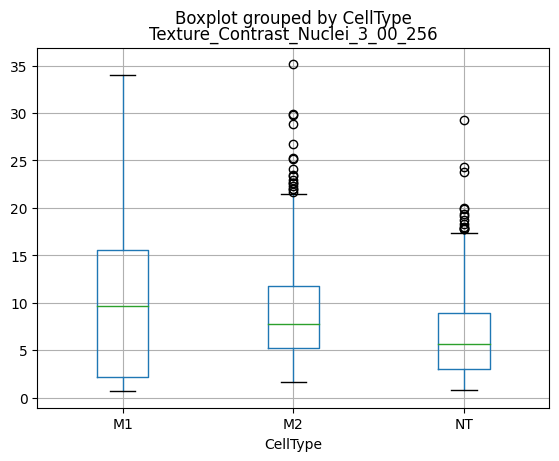

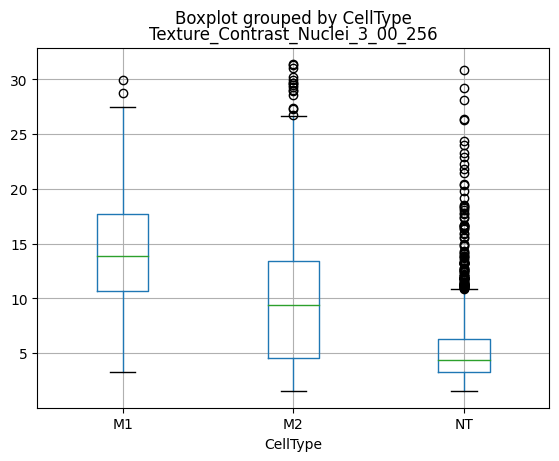

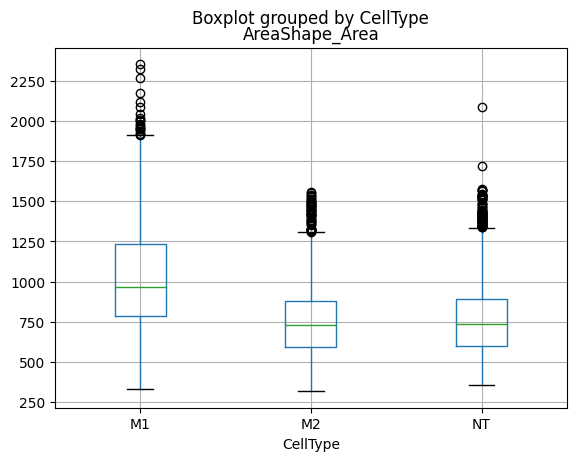

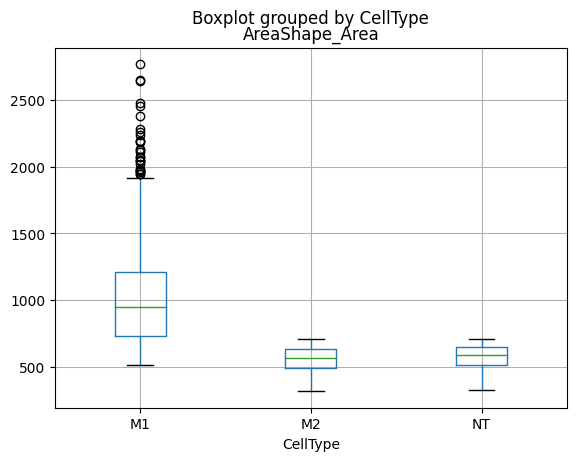

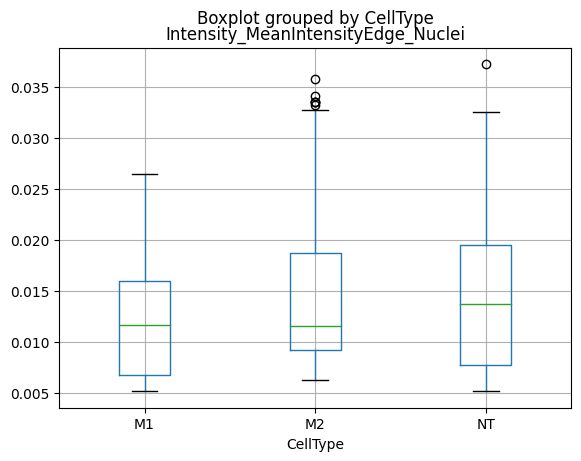

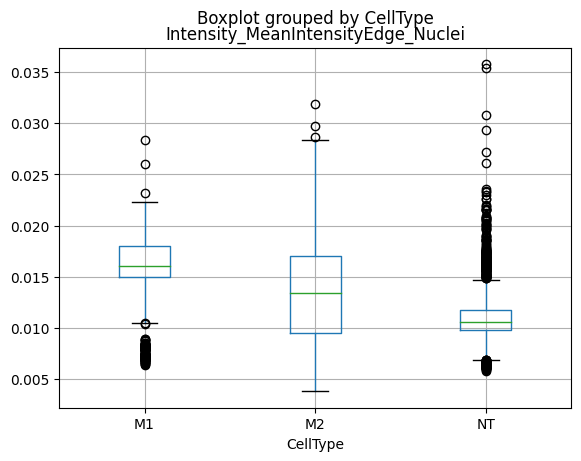

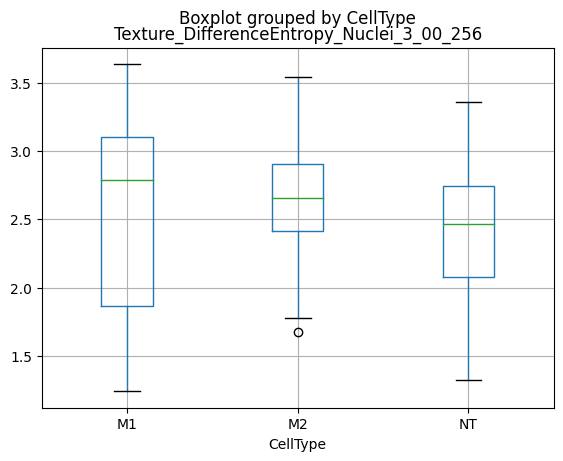

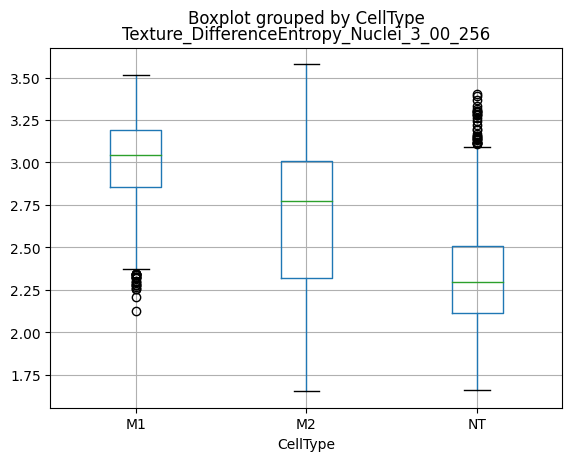

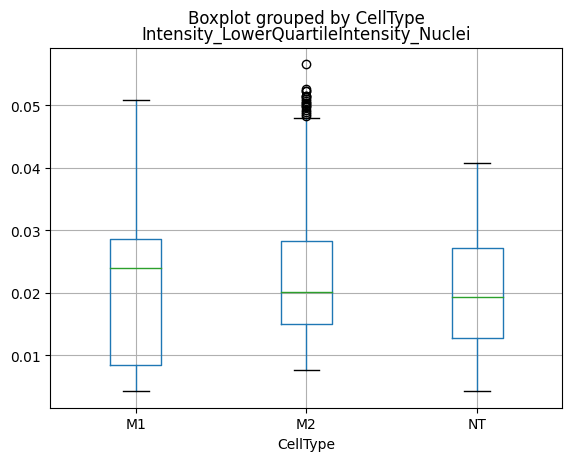

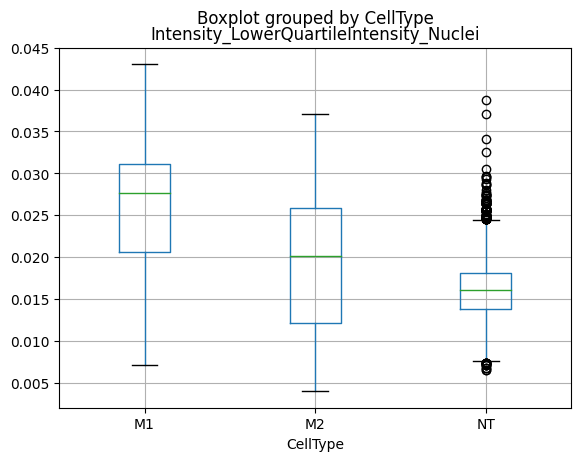

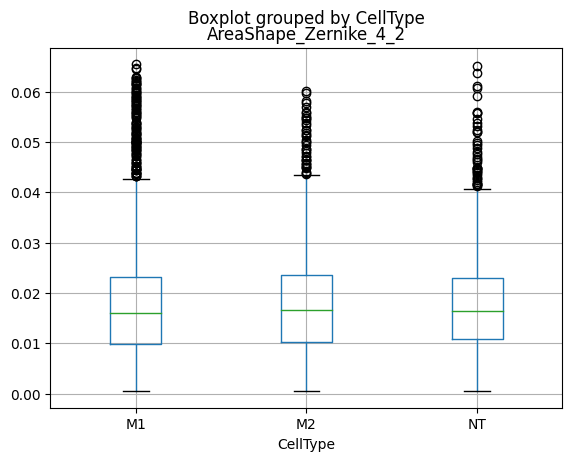

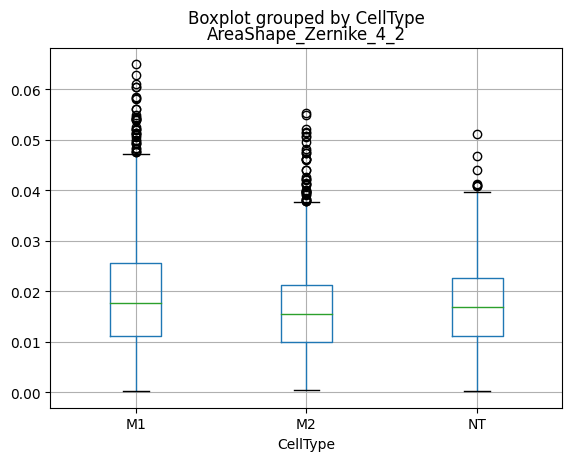

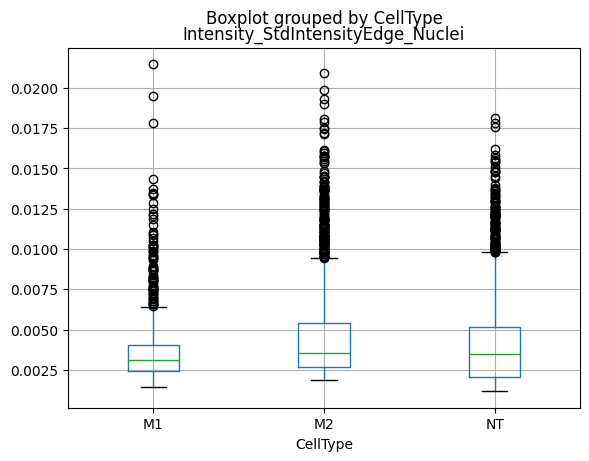

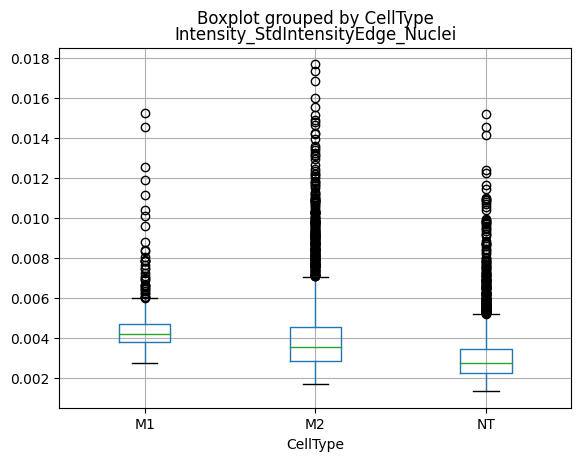

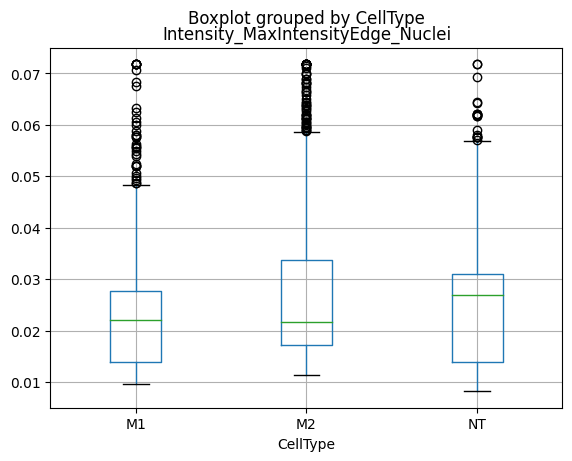

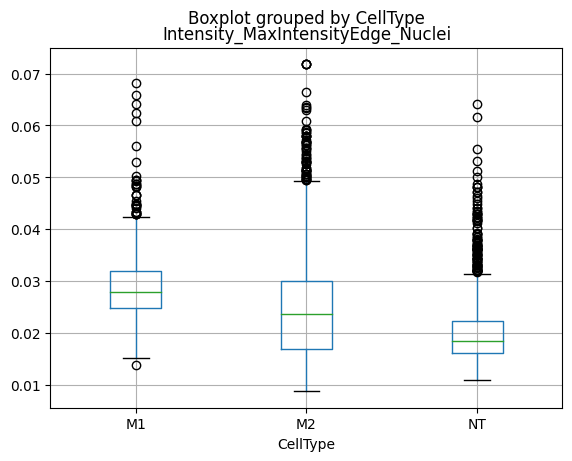

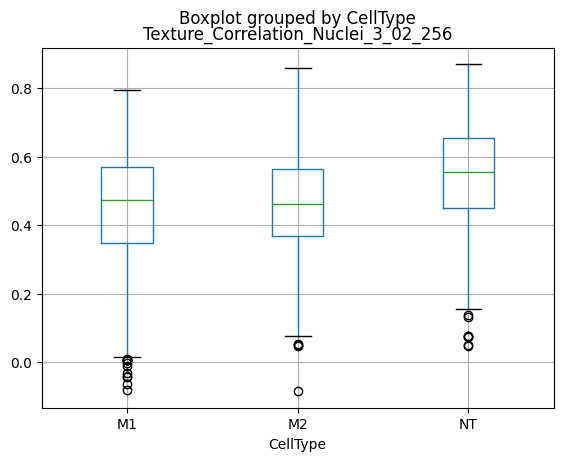

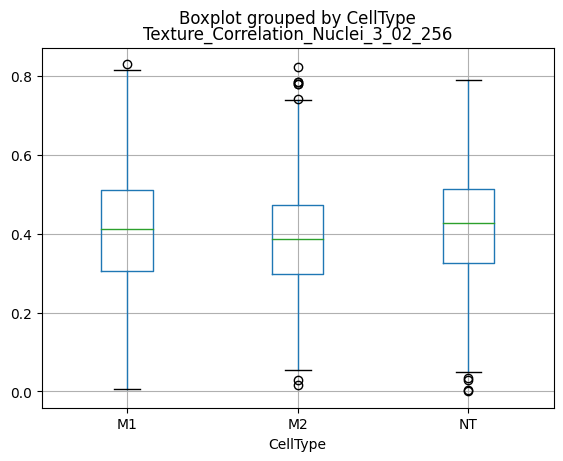

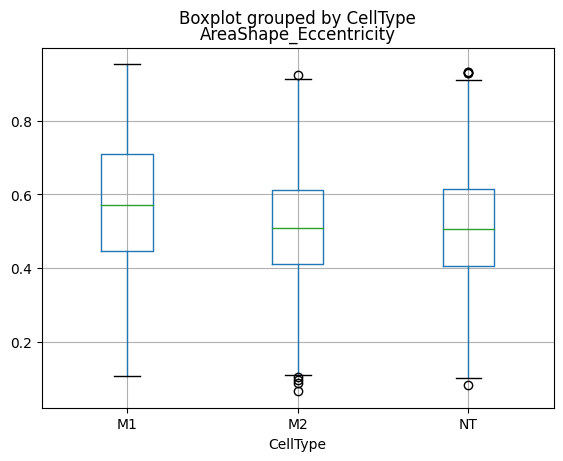

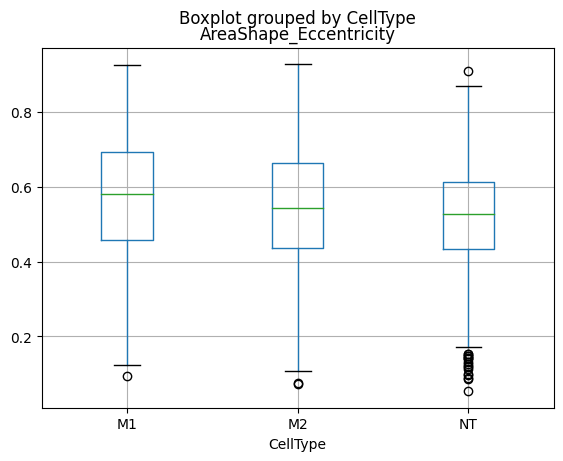

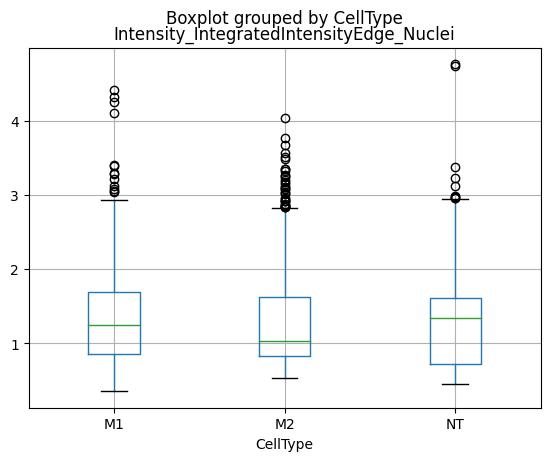

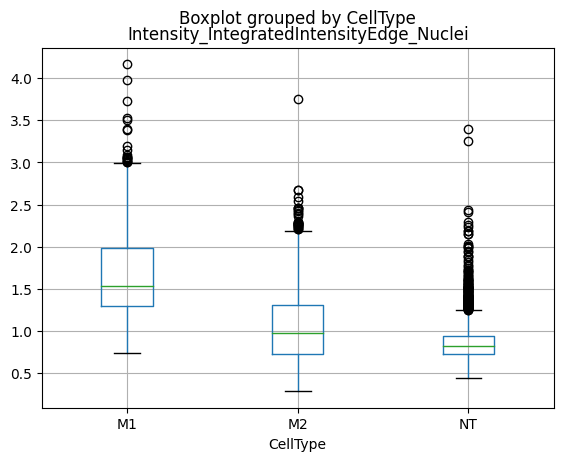

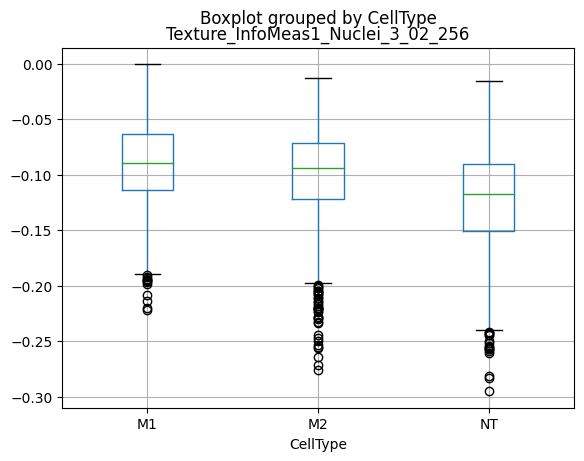

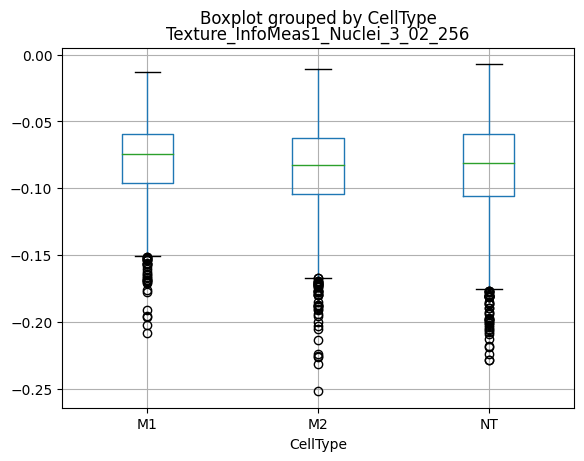

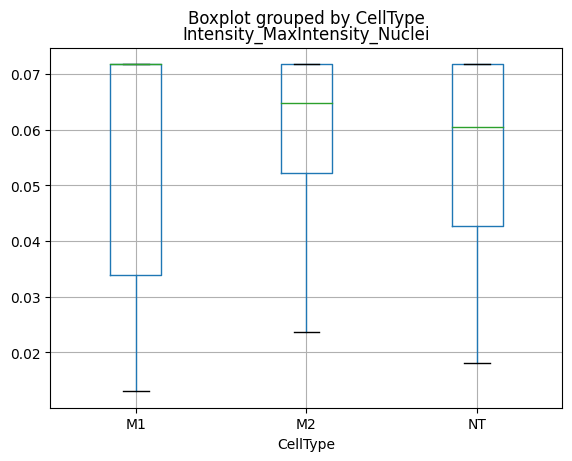

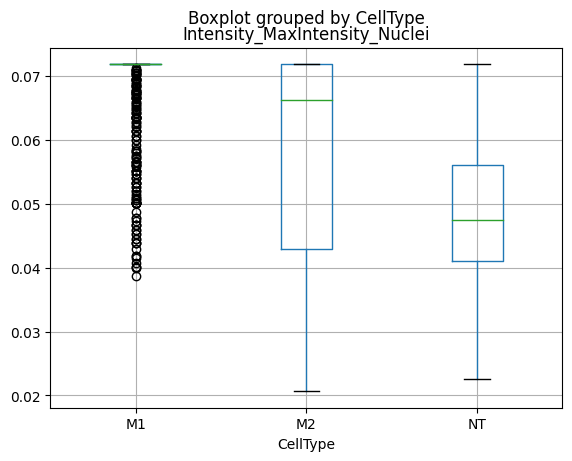

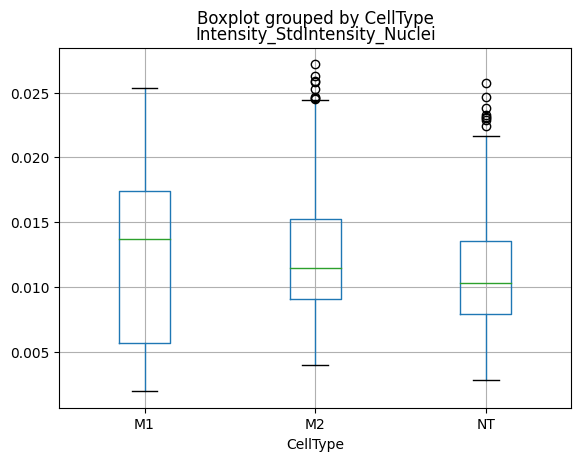

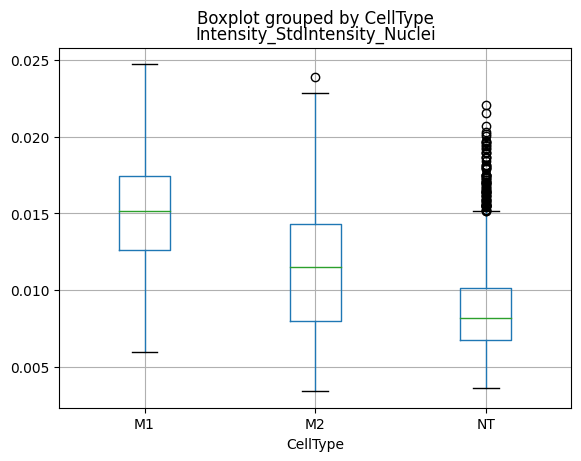

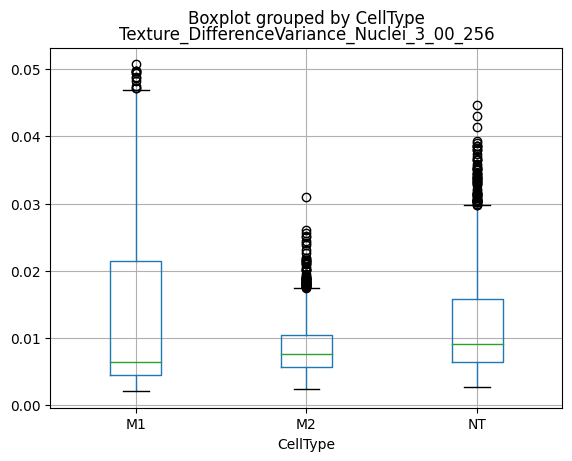

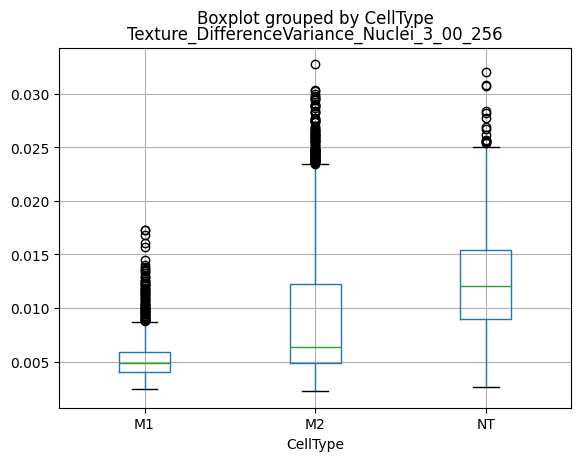

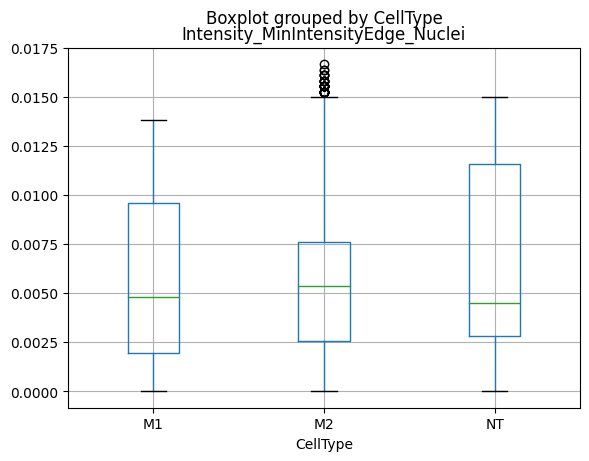

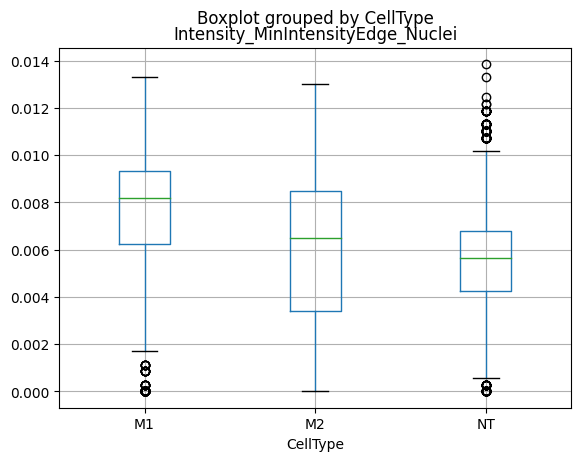

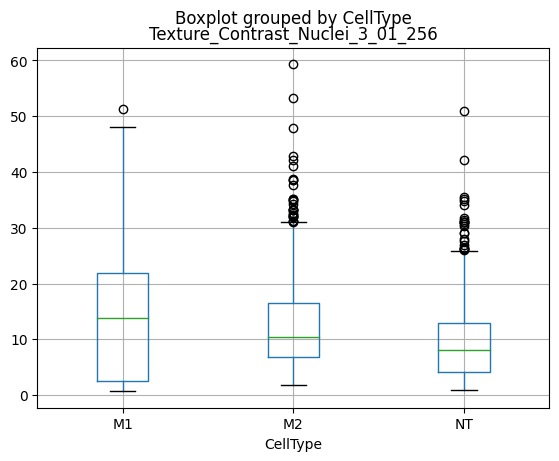

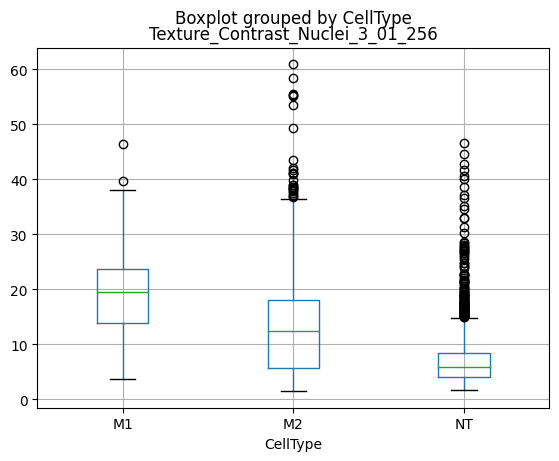

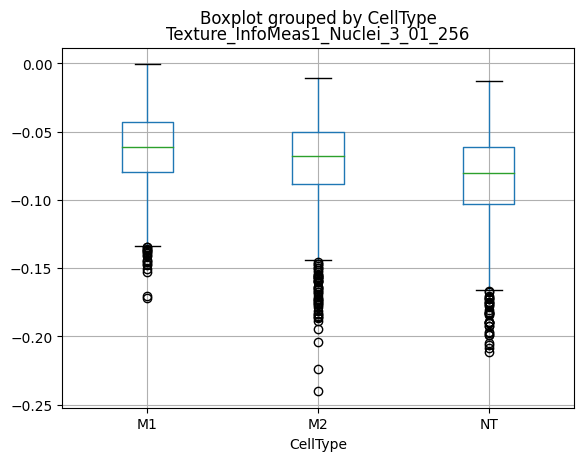

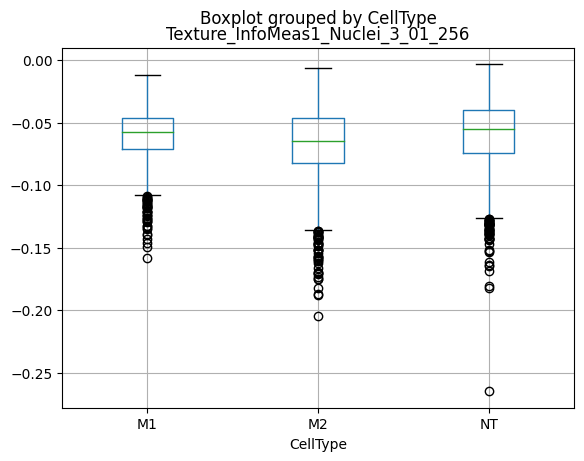

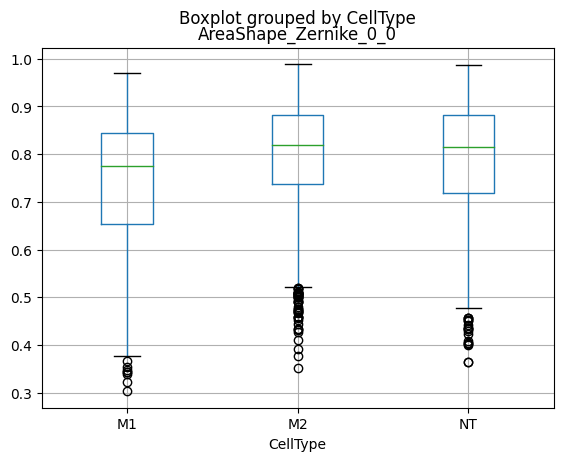

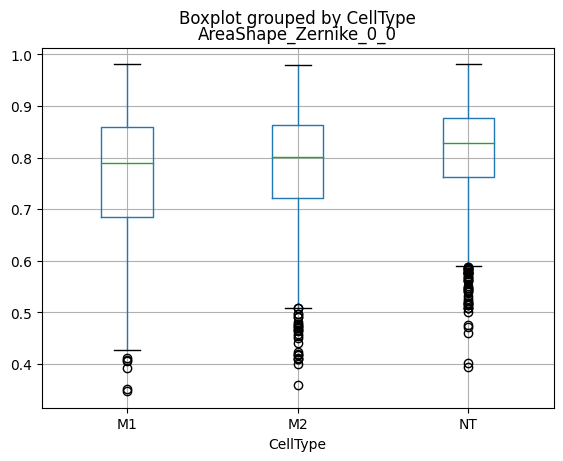

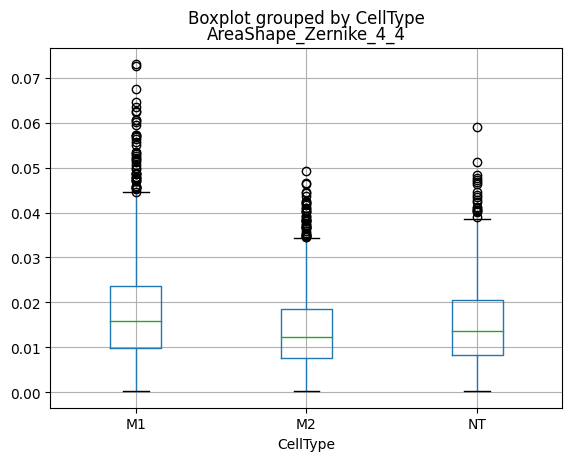

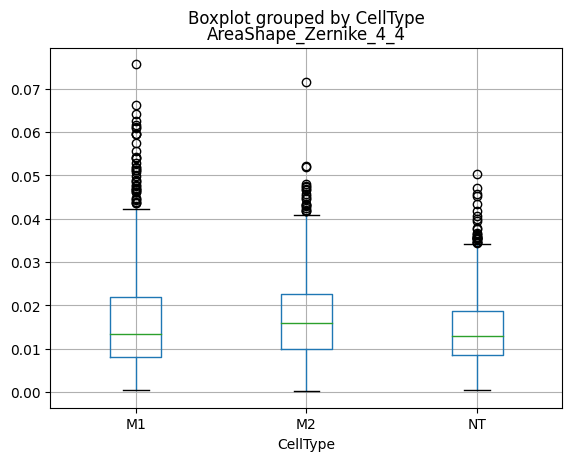

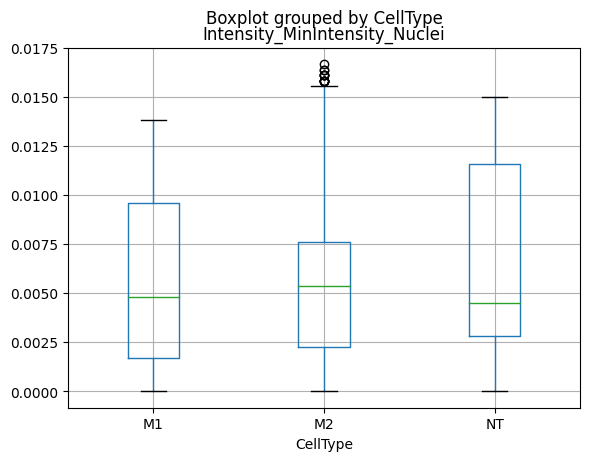

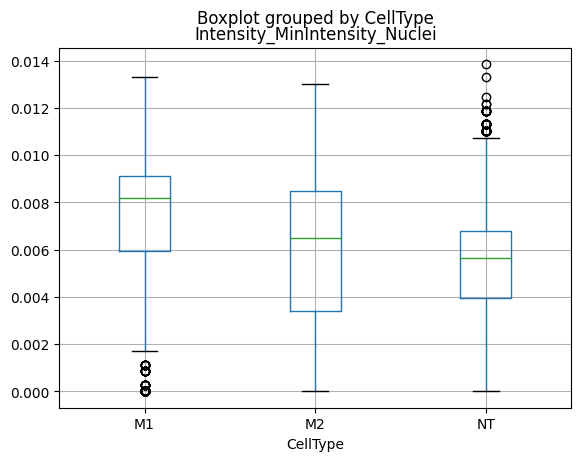

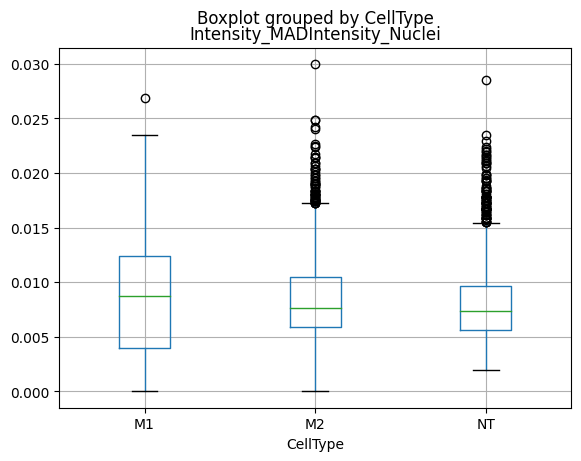

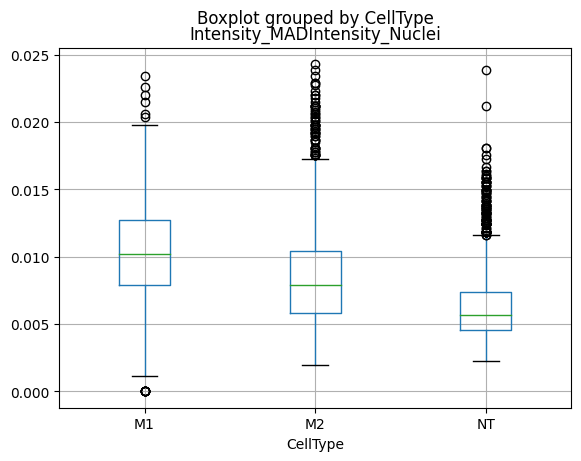

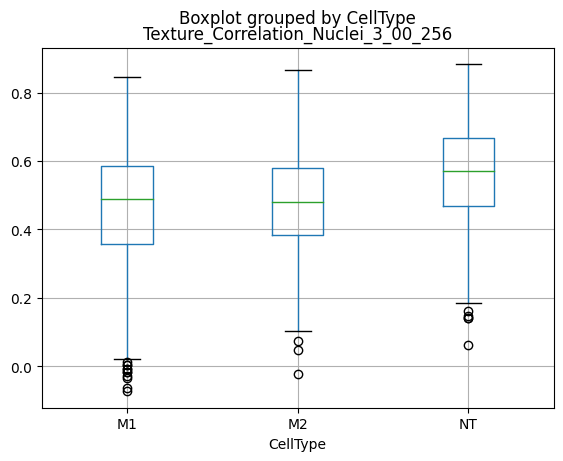

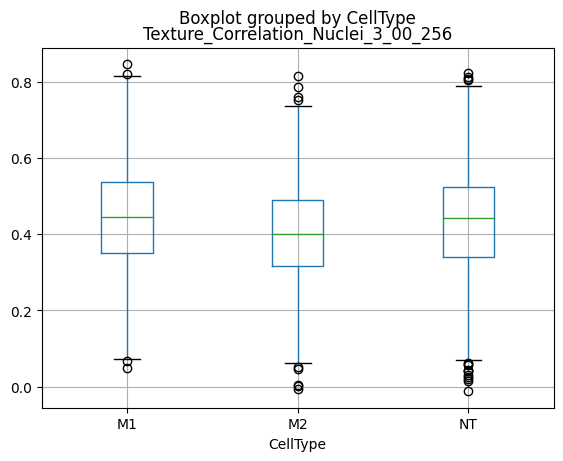

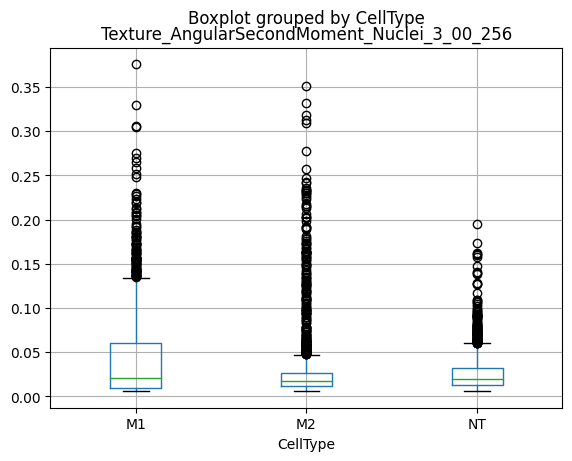

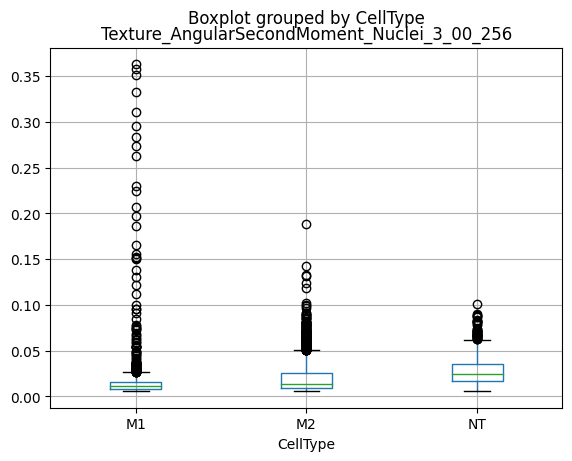

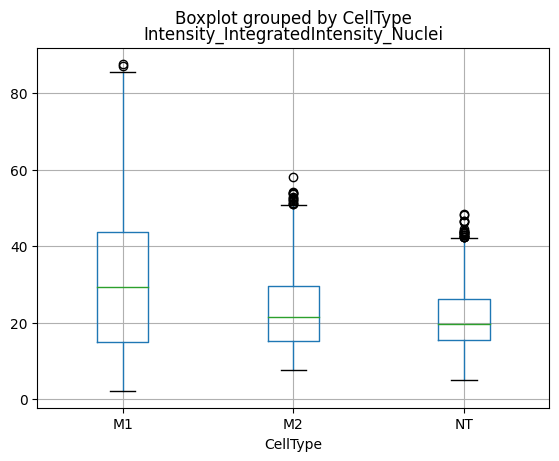

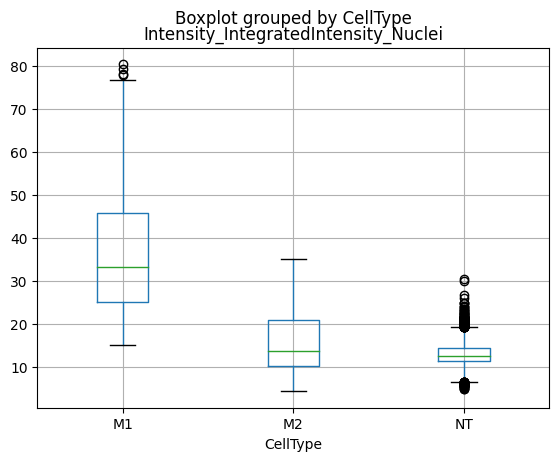

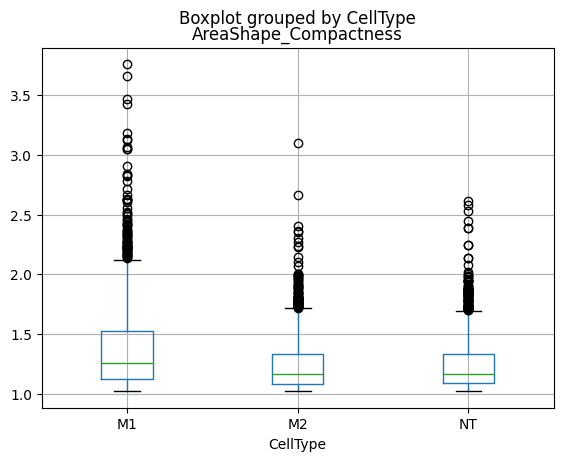

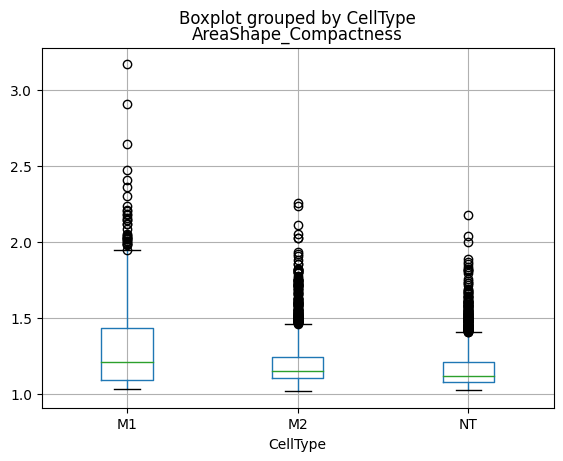

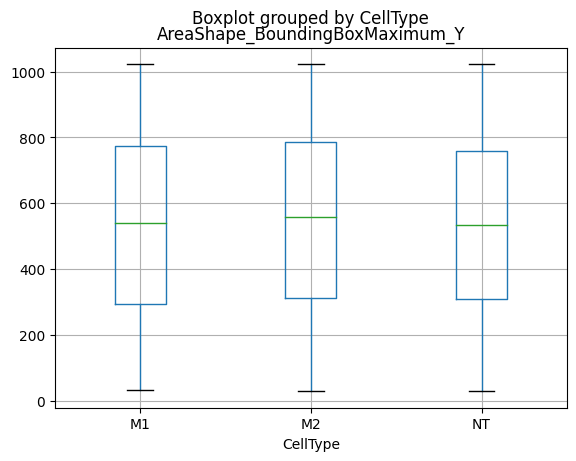

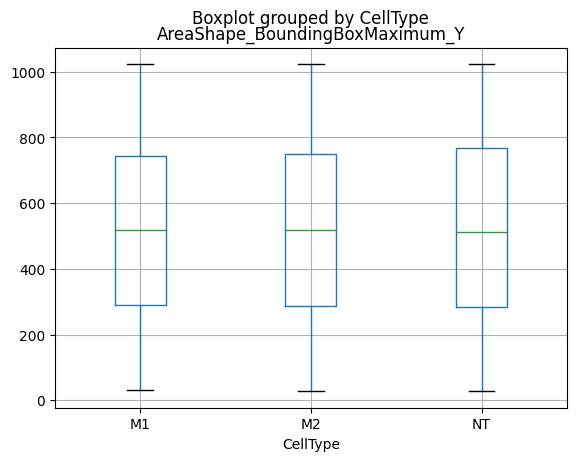

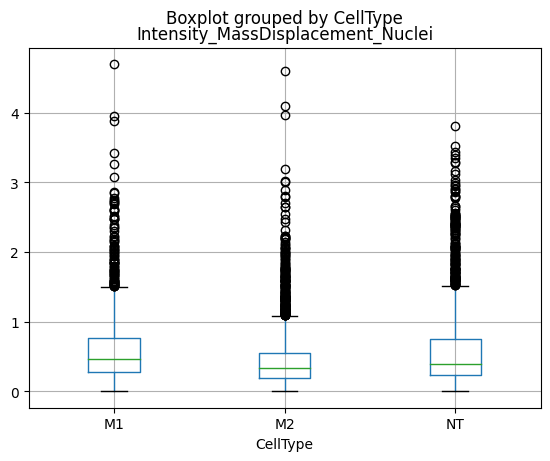

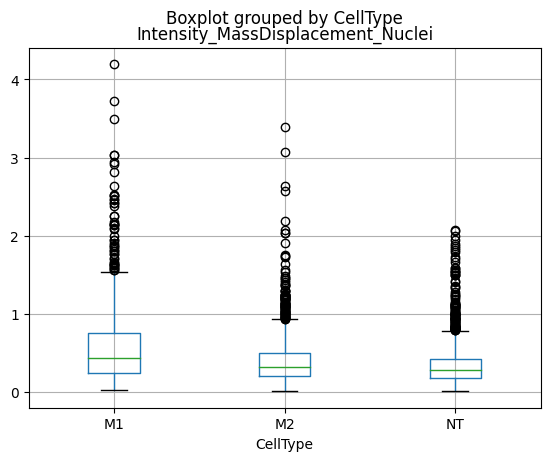

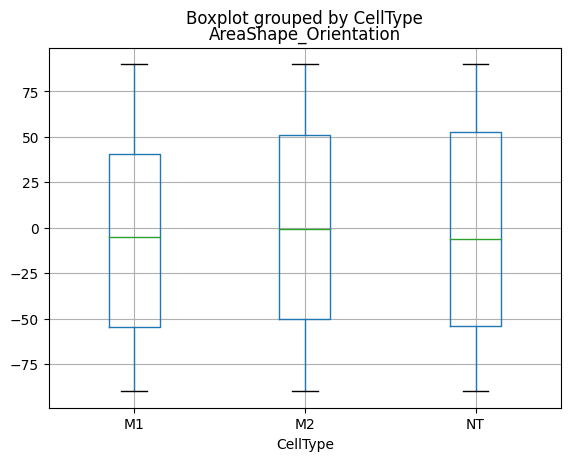

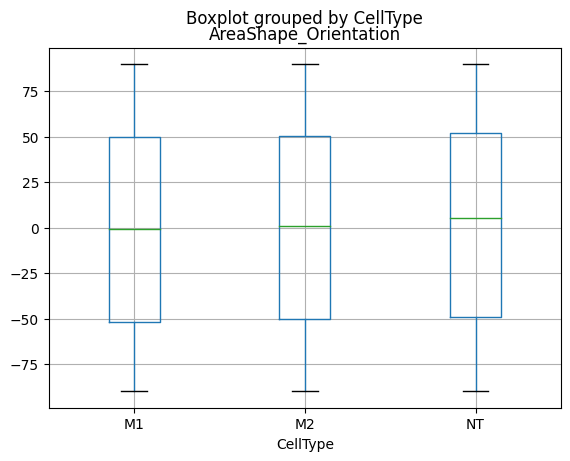

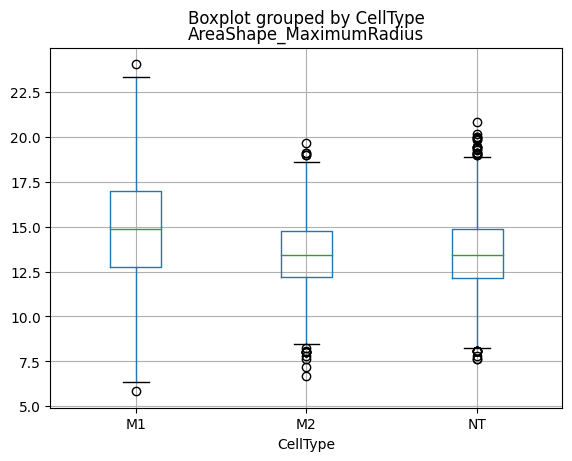

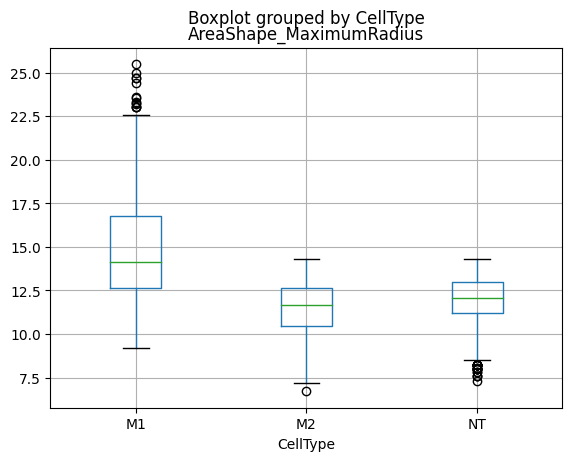

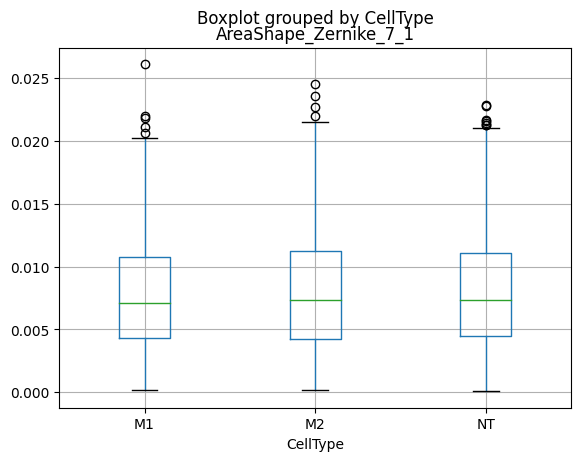

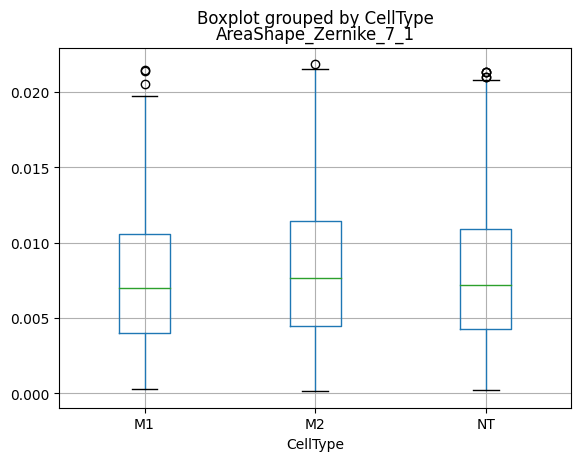

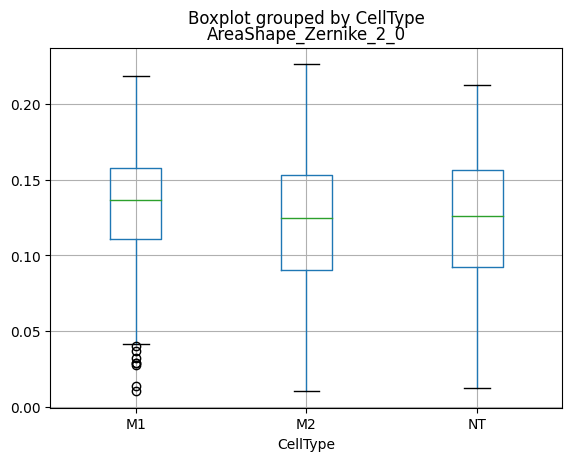

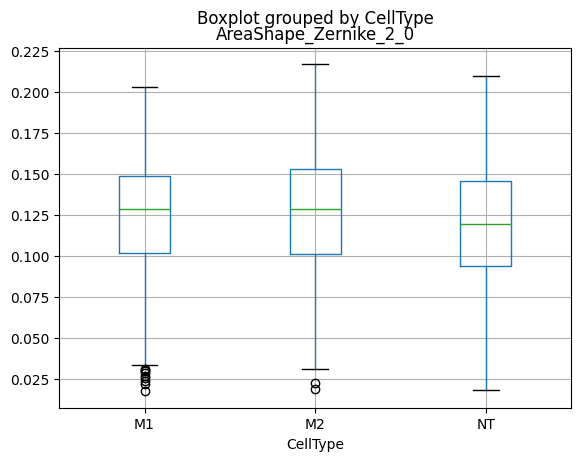

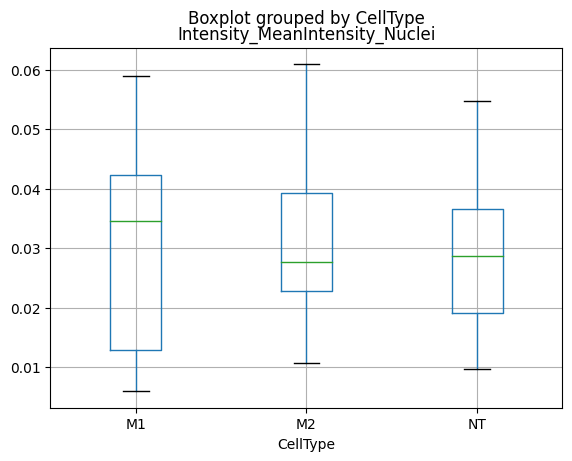

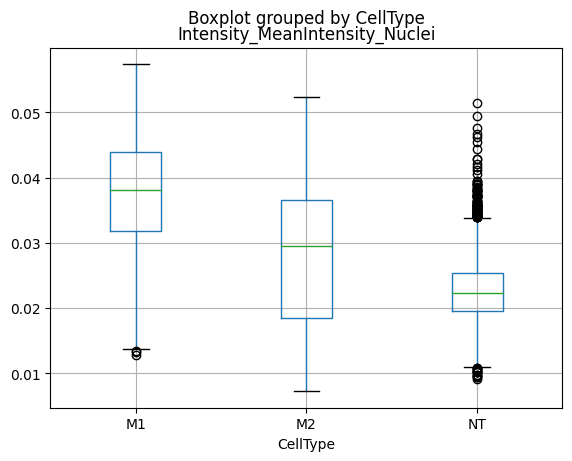

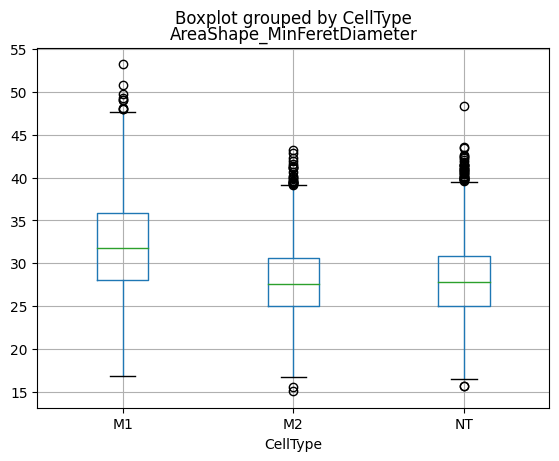

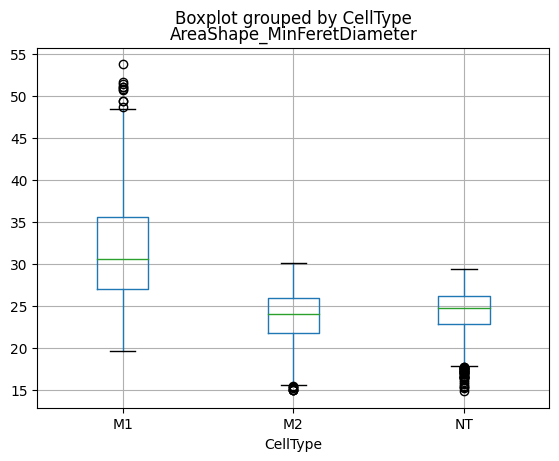

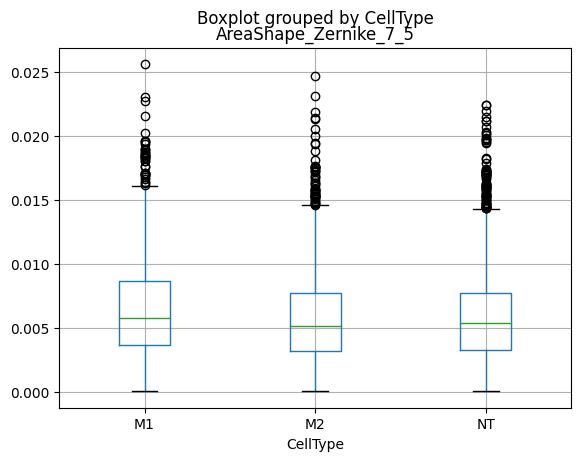

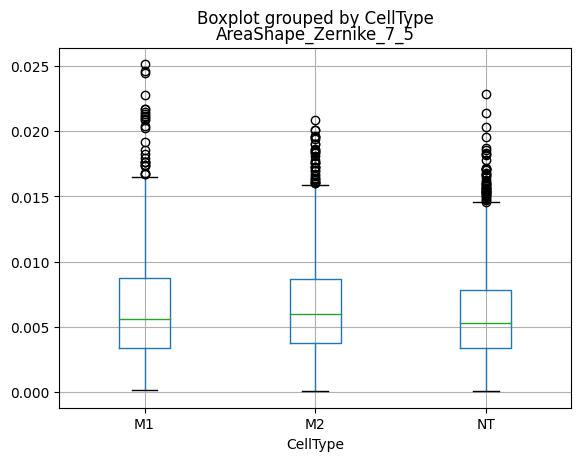

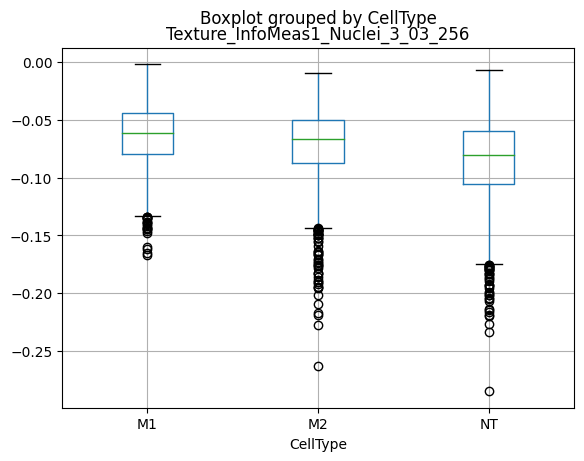

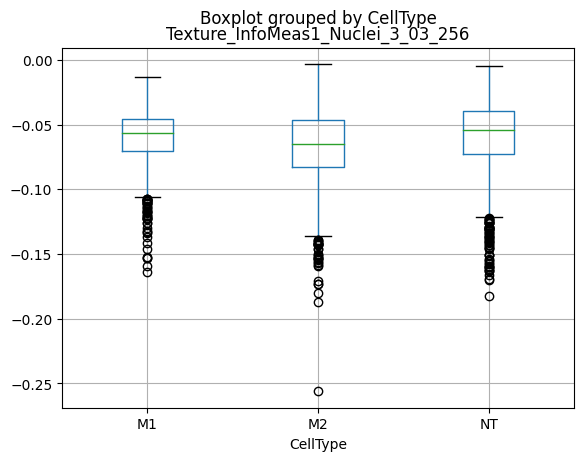

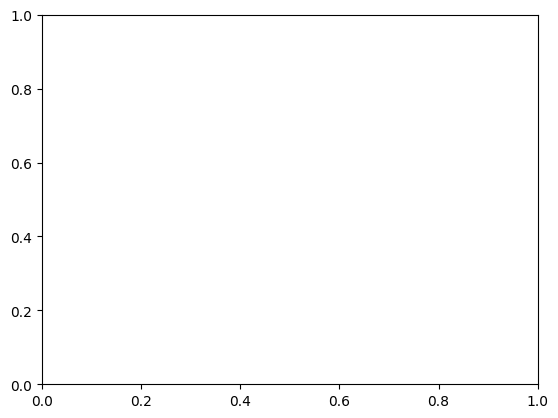

In [3]:
for column in all_surfaces_86.columns:
    all_surfaces_86.boxplot(column, by='CellType')
    all_surfaces_206.boxplot(column, by='CellType')